In [4]:
from read_mem import *
import matplotlib.pyplot as plt
import pathlib
from parse import parse

'8'

Total number of log files 12
/home/bastian/D1/registration/cubeslurm/437522_log_python_srun.txt E2A0.01LBFGS20NOSMOOTHENNC8_preconditioning_nosmoothen
/home/bastian/D1/registration/cubeslurm/437523_log_python_srun.txt E2A0.01LBFGS20NOSMOOTHENNC4_preconditioning_nosmoothen
/home/bastian/D1/registration/cubeslurm/437524_log_python_srun.txt E2A0.01LBFGS20NOSMOOTHENNC2_preconditioning_nosmoothen
/home/bastian/D1/registration/cubeslurm/437525_log_python_srun.txt E2A0.01LBFGS20NOSMOOTHENNC1_preconditioning_nosmoothen
/home/bastian/D1/registration/cubeslurm/437534_log_python_srun.txt E2A0.01LBFGS20NC1_none
/home/bastian/D1/registration/cubeslurm/437535_log_python_srun.txt E2A0.01LBFGS20NC2_none
/home/bastian/D1/registration/cubeslurm/437536_log_python_srun.txt E2A0.01LBFGS20NC4_none
/home/bastian/D1/registration/cubeslurm/437538_log_python_srun.txt E2A0.01LBFGS20NC8_none
/home/bastian/D1/registration/cubeslurm/437539_log_python_srun.txt E2A0.01LBFGS20NC8_preconditioning
/home/bastian/D1/regis

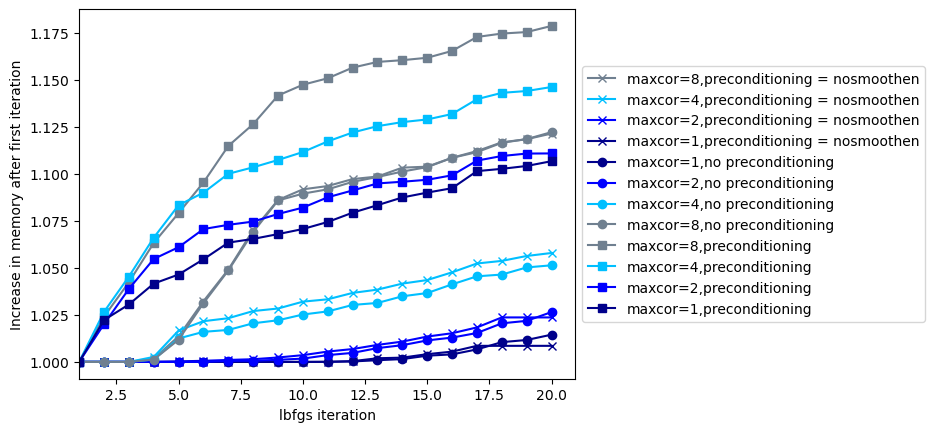

In [15]:
# filenames = ["/home/bastian/D1/registration/mrislurm/436844_log_python_srun.txt"]


path = pathlib.Path("/home/bastian/D1/registration/cubeslurm/")



slurmids = list(range(437522, 437526))
slurmids += list(range(437534, 437543))
slurmids.remove(437537)

print("Total number of log files", len(slurmids))

fig = plt.figure()
ax = plt.subplot(111)

colors = {1: "darkblue", 2: "blue", 4:"deepskyblue", 8:"slategrey"}

for slurmid in slurmids:

    filename = path / (str(slurmid) + "_log_python_srun.txt")

    mema, outfoldername = read_memory(filename)

    check_for_error(path / (str(slurmid) + ".out"))

    outfoldername = outfoldername.replace("\n", "")
    outfoldername = outfoldername.replace(" ", "")
    
    print(filename, outfoldername)
    try:
        mema[:,0]
        # print(mema[:, 0])
    except IndexError:
        print(outfoldername, "probably still running init? Continue.")
        continue
    # minm = min([np.min(mema[:, 1]), minm])

    marker = "o"
    linestyle = "-"

    res = parse("{}NC{}_{}", outfoldername)
    nc = res[1]
    color = colors[int(nc)]

    if "self" in outfoldername:
        marker = "d"

    if "NOSMOOTHEN" in outfoldername:
        marker = "x"
    elif "preconditioning" in outfoldername:
        linestyle = "-"
        marker = "s"

    minm = None

    plt.plot(mema[:,0], mema[:,1] / (0 + 1 * mema[0,1]), marker=marker, color=color, linestyle=linestyle, 
            label="maxcor="+res[1] + "," + res[2].replace("none", "no preconditioning").replace("preconditioning_nosmoothen", "preconditioning = nosmoothen"), #outfoldername
            )
    plt.legend()

plt.xlabel("lbfgs iteration")
plt.ylabel("Increase in memory after first iteration")
plt.xlim(1, None)
plt.ylim(minm, None)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()